In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(42)
df = pd.DataFrame({
    'Age': np.random.randint(18, 70, 200),
    'Annual Income (k$)': np.random.randint(15, 137, 200),
    'Spending Score (1-100)': np.random.randint(1, 101, 200)
})

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
df['KMeans Cluster'] = kmeans_labels

Z = linkage(X_scaled, method='ward')
hier_labels = fcluster(Z, t=3, criterion='maxclust')
df['Hierarchical Cluster'] = hier_labels


Text(0.5, 1.0, 'KMeans Clustering')

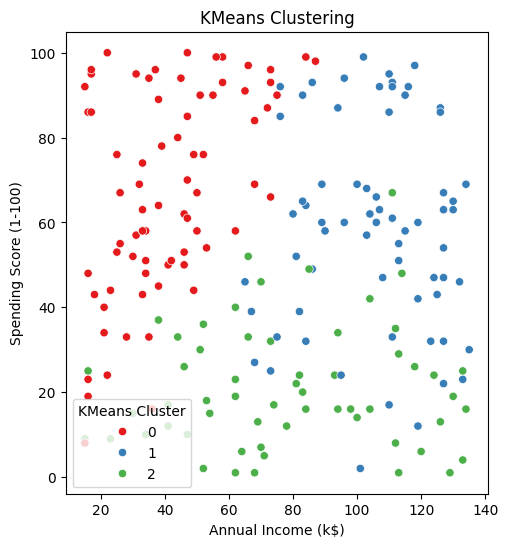

In [5]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='KMeans Cluster', palette='Set1')
plt.title("KMeans Clustering")

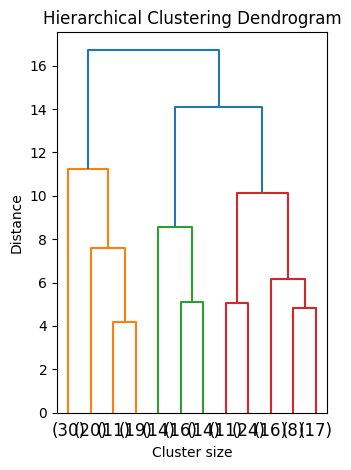

Silhouette Score - KMeans: 0.23
Silhouette Score - Hierarchical: 0.23


In [6]:
plt.subplot(1, 2, 2)
dendrogram(Z, truncate_mode='lastp', p=12)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Cluster size")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

sil_kmeans = silhouette_score(X_scaled, kmeans_labels)
sil_hier = silhouette_score(X_scaled, hier_labels)
print(f"Silhouette Score - KMeans: {sil_kmeans:.2f}")
print(f"Silhouette Score - Hierarchical: {sil_hier:.2f}")
